In [4]:
train_data_link=r'C:\Users\mohit\Downloads\archive\training'
val_data_link=r'C:\Users\mohit\Downloads\archive\validation'


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [8]:
train_datagen=ImageDataGenerator(
              rescale=1./255,
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              vertical_flip=True,
              brightness_range=(0.8, 1.2)
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
train_data=train_datagen.flow_from_directory(train_data_link,batch_size=100,target_size=(150,150),class_mode='categorical')
val_data=train_datagen.flow_from_directory(val_data_link,batch_size=100,target_size=(150,150),class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_data_link,batch_size=100,target_size=(150,150),class_mode='categorical')

Found 4226 images belonging to 5 classes.
Found 1381 images belonging to 5 classes.
Found 1629 images belonging to 5 classes.


In [18]:
print(f' class assumtions for train data : {train_data.class_indices}')
print(f' class assumtions for val data : {val_data.class_indices}')
print(f' class assumtions for test data : {test_data.class_indices}')
print(f' The Batch size of the iterator is {len(train_data.next()[0])}')
print(f' The input image shape is {train_data.next()[0][0].shape}')

 class assumtions for train data : {'Bread': 0, 'Egg': 1, 'Meat': 2, 'Noodles-Pasta': 3, 'Rice': 4}
 class assumtions for val data : {'Bread': 0, 'Egg': 1, 'Meat': 2, 'Noodles-Pasta': 3, 'Rice': 4}
 class assumtions for test data : {'Bread': 0, 'Egg': 1, 'Meat': 2, 'Noodles-Pasta': 3, 'Rice': 4}
 The Batch size of the iterator is 100
 The input image shape is (150, 150, 3)


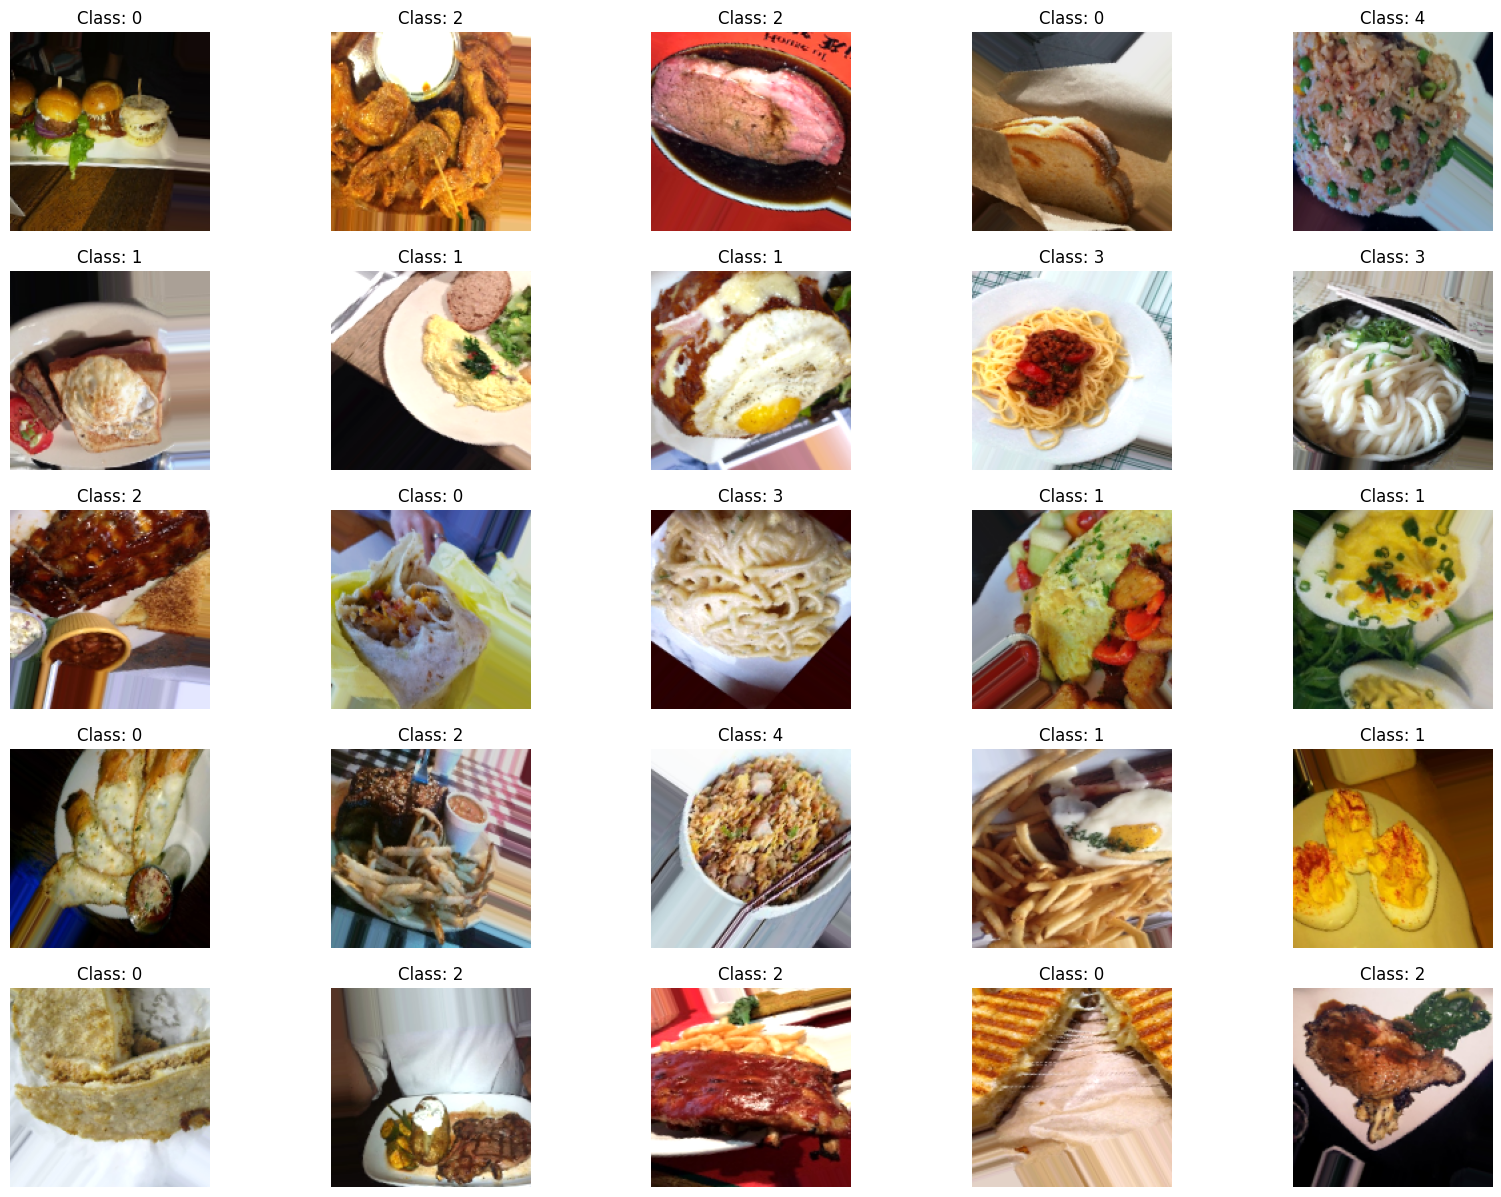

In [21]:
images, labels = next(train_data)

fig, axes = plt.subplots(5, 5, figsize=(20,15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(f'Class: {np.argmax(labels[i])}')

plt.show()

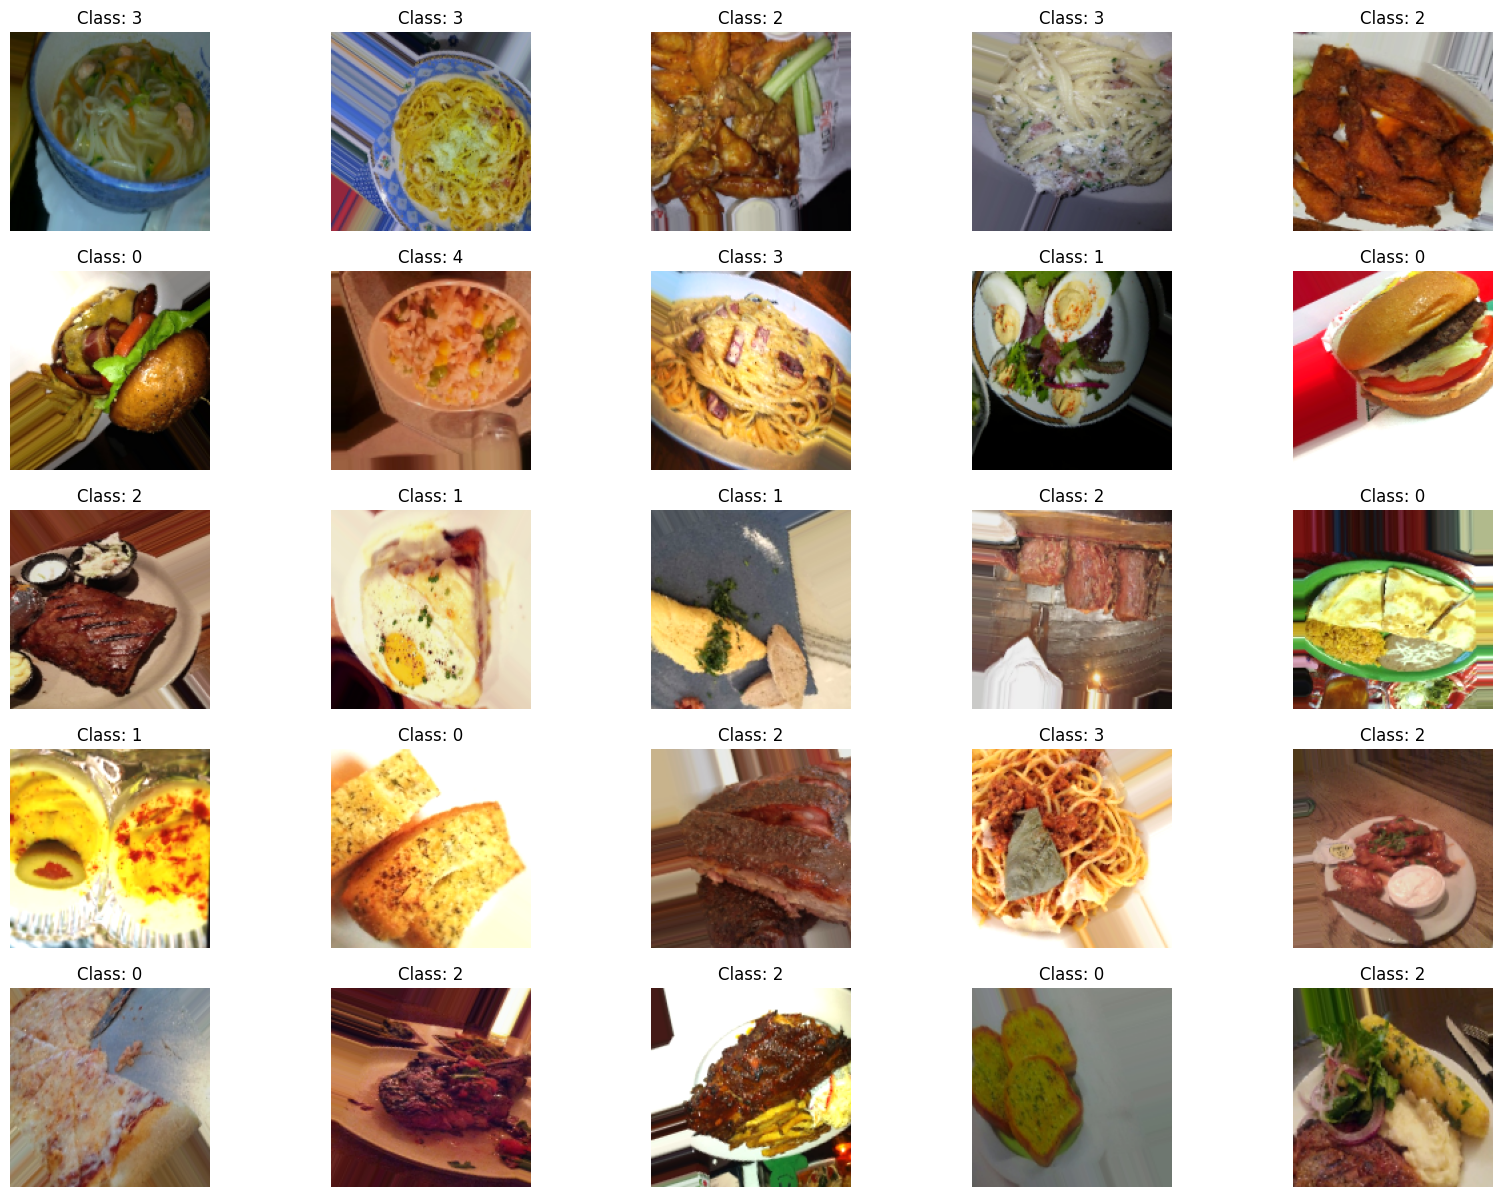

In [22]:
images, labels = next(val_data)

fig, axes = plt.subplots(5, 5, figsize=(20,15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(f'Class: {np.argmax(labels[i])}')

plt.show()

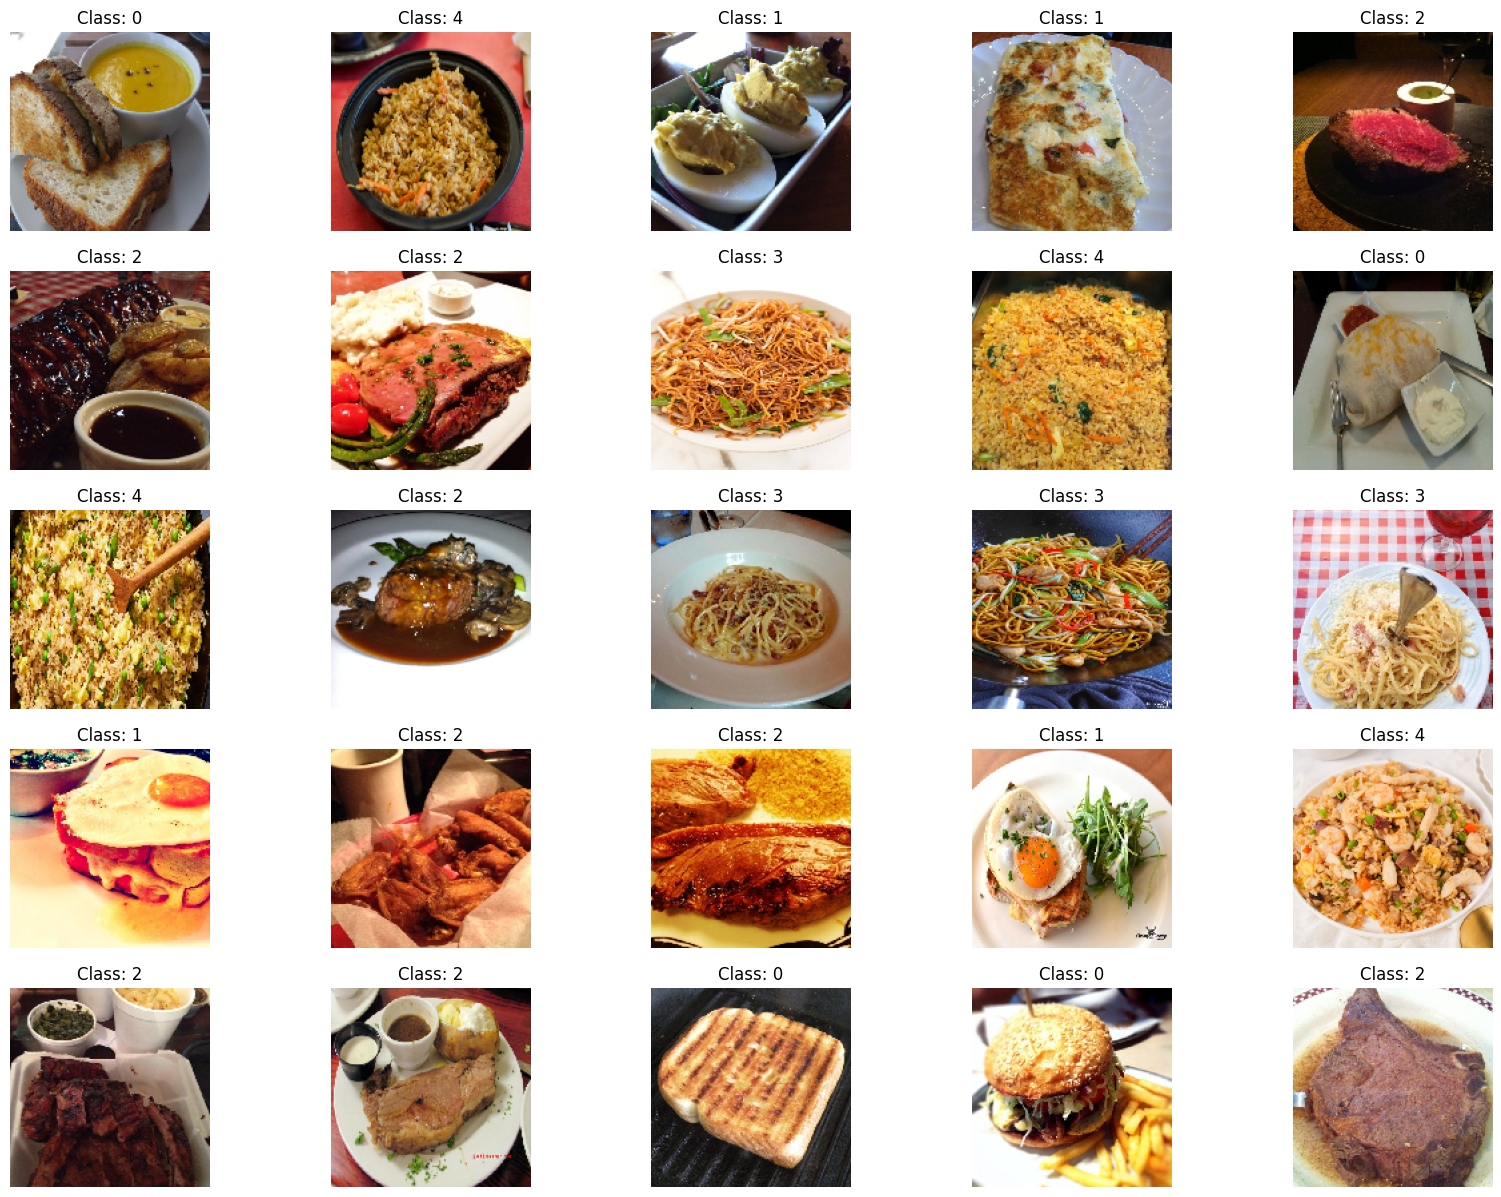

In [24]:
images, labels = next(test_data)

fig, axes = plt.subplots(5, 5, figsize=(20,15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(f'Class: {np.argmax(labels[i])}')

plt.show()

In [25]:
num_classes=len(train_data.next()[1][0])

In [31]:
model=Sequential()
model.add( Conv2D( 32 , (3,3) , padding='same' , activation=tf.nn.relu , input_shape=(150,150,3) ))
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(64 , (3,3) , padding='same' , activation=tf.nn.relu ) )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(64 , (3,3) , padding='same' , activation=tf.nn.relu ) )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(128 , (3,3) , padding='same' , activation=tf.nn.relu ) )
model.add( MaxPooling2D(2,2) )
model.add(Flatten())
model.add(Dense(524 , activation=tf.nn.relu))
model.add(Dropout(rate=0.5))
model.add(Dense(262 , activation=tf.nn.relu))
model.add(Dense(num_classes,activation=tf.nn.softmax))



model.compile(optimizer=RMSprop(learning_rate=0.001) , loss='categorical_crossentropy' , metrics=['acc'])

In [32]:
checkpoint_filepath = 'models/'


model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_filepath, 'model_epoch_{epoch:02d}.h5'),
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',  
    mode='min',          
    verbose=1
)

callbacks=[model_checkpoint]

In [35]:
history=model.fit(train_data,epochs=60 , validation_data=val_data , verbose=1 , callbacks=callbacks)

Epoch 1/60
43/43 [==============================] - ETA: 0s - loss: 0.5128 - acc: 0.8119
Epoch 1: val_loss did not improve from 0.61048
43/43 [==============================] - 63s 1s/step - loss: 0.5128 - acc: 0.8119 - val_loss: 0.6852 - val_acc: 0.7487
Epoch 2/60
43/43 [==============================] - ETA: 0s - loss: 0.5272 - acc: 0.8057
Epoch 2: val_loss did not improve from 0.61048
43/43 [==============================] - 59s 1s/step - loss: 0.5272 - acc: 0.8057 - val_loss: 0.6657 - val_acc: 0.7618
Epoch 3/60
43/43 [==============================] - ETA: 0s - loss: 0.4956 - acc: 0.8164
Epoch 3: val_loss did not improve from 0.61048
43/43 [==============================] - 62s 1s/step - loss: 0.4956 - acc: 0.8164 - val_loss: 0.6428 - val_acc: 0.7661
Epoch 4/60
43/43 [==============================] - ETA: 0s - loss: 0.5025 - acc: 0.8100
Epoch 4: val_loss did not improve from 0.61048
43/43 [==============================] - 62s 1s/step - loss: 0.5025 - acc: 0.8100 - val_loss: 0.673

In [9]:
test_data_link=r'C:\Users\mohit\Downloads\archive\evaluation'
test_data=test_datagen.flow_from_directory(test_data_link,batch_size=100,target_size=(150,150),class_mode='categorical')

Found 1629 images belonging to 5 classes.


In [3]:
final_model=load_model('models\model_epoch_53.h5')

In [49]:
batch=test_data.next()

In [50]:
predictions=final_model.predict(batch[0])

4/4 [==============================] - 1s 156ms/step


In [51]:
print(len(predictions))

100


In [52]:
pred=[np.argmax(i) for i in predictions]

In [53]:
org=[np.argmax(i) for i in batch[1]]

In [54]:
accuracy = accuracy_score(org, pred)
print("Accuracy:", accuracy)

precision = precision_score(org, pred, average='weighted') 
print("Precision:", precision)


recall = recall_score(org, pred, average='weighted')  
print("Recall:", recall)


f1 = f1_score(org, pred, average='weighted')  
print("F1-score:", f1)


conf_matrix = confusion_matrix(org, pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.85
Precision: 0.8554923834335598
Recall: 0.85
F1-score: 0.8470206851971557
Confusion Matrix:
[[15  3  3  1  0]
 [ 1 21  3  0  0]
 [ 1  0 22  0  0]
 [ 0  2  0 10  1]
 [ 0  0  0  0 17]]
